# Data Project: Sustainable Returns

**Table of contents**<a id='toc0_'></a>    
- 1. [Introduction](#toc1_)     
- 2. [Presentation of Data](#toc2_)    
- 3. [Data Analysis](#toc3_)    
- 4. [Conclusion](#toc4_) 

# 1. <a id='toc1_'></a>[Introduction](#toc0_)

For this project, we want to investigate whether high ESG scores has a positive effect for returns on stocks. ESG is short for environmental, social and governance and is a measure of sustainability. The amount and awareness of ESG investments has grown a lot in recent years, and it is a great tool for investors when making sustainable investments decisions as it is very easy to find information of companies’ ESG strategies and scores. 

We have found ESG scores through Refinitiv, which gives an overall score from 1-100 based on the companies’ own ESG reports. The score is based on how well the company fulfills the ESG criteria, which extends over subjects such as emissions, human rights, workforce, management and corporate social responsibility strategy. 

In this data project, we investigate if there is a correlation between a given firm's ESG score and the return their stocks as well as the volatility.

# 2. <a id='toc2_'></a>[Presentation of Data](#toc0_)

First of all, we import the required packages and store them.

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates
import yfinance as yf
from datetime import datetime, timedelta
import os
from matplotlib.widgets import CheckButtons
from scipy.stats import linregress
import random

We have then loaded ESG scores for 15 different companies from the Danish C25 index through a csv file. The respective companies and ESG scores are first printed, and then presented in the bar graph below.

          stock  ESG Score
0     CARL-B.CO         77
1     COLO-B.CO         75
2     DANSKE.CO         75
3        DSV.CO         81
4   MAERSK-B.CO         71
5     NOVO-B.CO         85
6         GN.CO         74
7     ORSTED.CO         76
8     PNDORA.CO         77
9      RBREW.CO         62
10      TRYG.CO         68
11       VWS.CO         73
12    DEMANT.CO         56
13    ROCK-B.CO         69
14      JYSK.CO         53


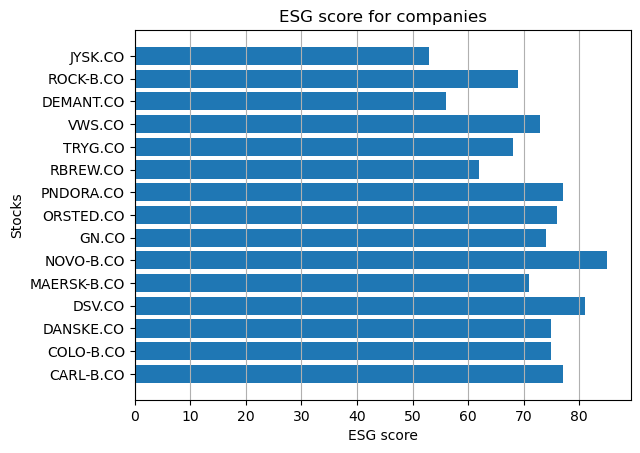

In [107]:
# read the csv-file including data of the ESG scores of 15 danish companies
df = pd.read_csv('Companies ESG scores2.csv', delimiter=";")
print(df) # print the data

# create a bar plot illustrating the ESG scores of the companies
fig, ax = plt.subplots()
ax.barh(df['stock'], df['ESG Score'])
ax.set_xlabel('ESG score')
ax.set_ylabel('Stocks')
ax.set_title('ESG score for companies')
ax.xaxis.grid(True)
plt.show()

From the ESG scores, it is clear to see, that Novo Nordisk and DSV scores highest with values of 85 and 81. A lot of the other companies span around 68-77, while the lowest are Jyske Bank, Demant and Royal Unibrew with an ESG score of 53, 56 and 62, respectively. From the Refinitiv website, it is stated that ESG scores > 50 "indicates good relative ESG performance and above average degree of transparency in reporting material ESG data publicly" and ESG scores > 75 "indicates excellent relative ESG performance and high degree of transparency in reporting material ESG data publicly". This means that all the chosen companies has good ESG performance, while a few has excellent ESG performance. 

This is an expected result as danish companies in general have a large focus on sustainablility in all the ways the ESG score is meassured. 

Other than ESG scores, we have also loaded every company’s monthly stock price from the 1st of June 2018 until the 1st of May 2023. Below we have written code that downloads the data from yfinance. When we download it, we make sure to specify which data we want, which in this case is the adjusted close values. We also write code to prevent it from getting new data everytime we run the code cell.

From this data, we have taken the log prices as it makes the stock prices comparable in a plot since stock prices can vary greatly across firms. We then calculate the log difference in prices and also derive their average monthly return.

We then produce plots for the log prices and log differences for the period in order to present the additional component of our data.

Data already exists for CARL-B.CO. Skipping download.
Data collected for CARL-B.CO
Data already exists for COLO-B.CO. Skipping download.
Data collected for COLO-B.CO
Data already exists for DANSKE.CO. Skipping download.
Data collected for DANSKE.CO
Data already exists for DSV.CO. Skipping download.
Data collected for DSV.CO
Data already exists for MAERSK-B.CO. Skipping download.
Data collected for MAERSK-B.CO
Data already exists for NOVO-B.CO. Skipping download.
Data collected for NOVO-B.CO
Data already exists for GN.CO. Skipping download.
Data collected for GN.CO
Data already exists for ORSTED.CO. Skipping download.
Data collected for ORSTED.CO
Data already exists for PNDORA.CO. Skipping download.
Data collected for PNDORA.CO
Data already exists for RBREW.CO. Skipping download.
Data collected for RBREW.CO
Data already exists for TRYG.CO. Skipping download.
Data collected for TRYG.CO
Data already exists for VWS.CO. Skipping download.
Data collected for VWS.CO
Data already exists for DE

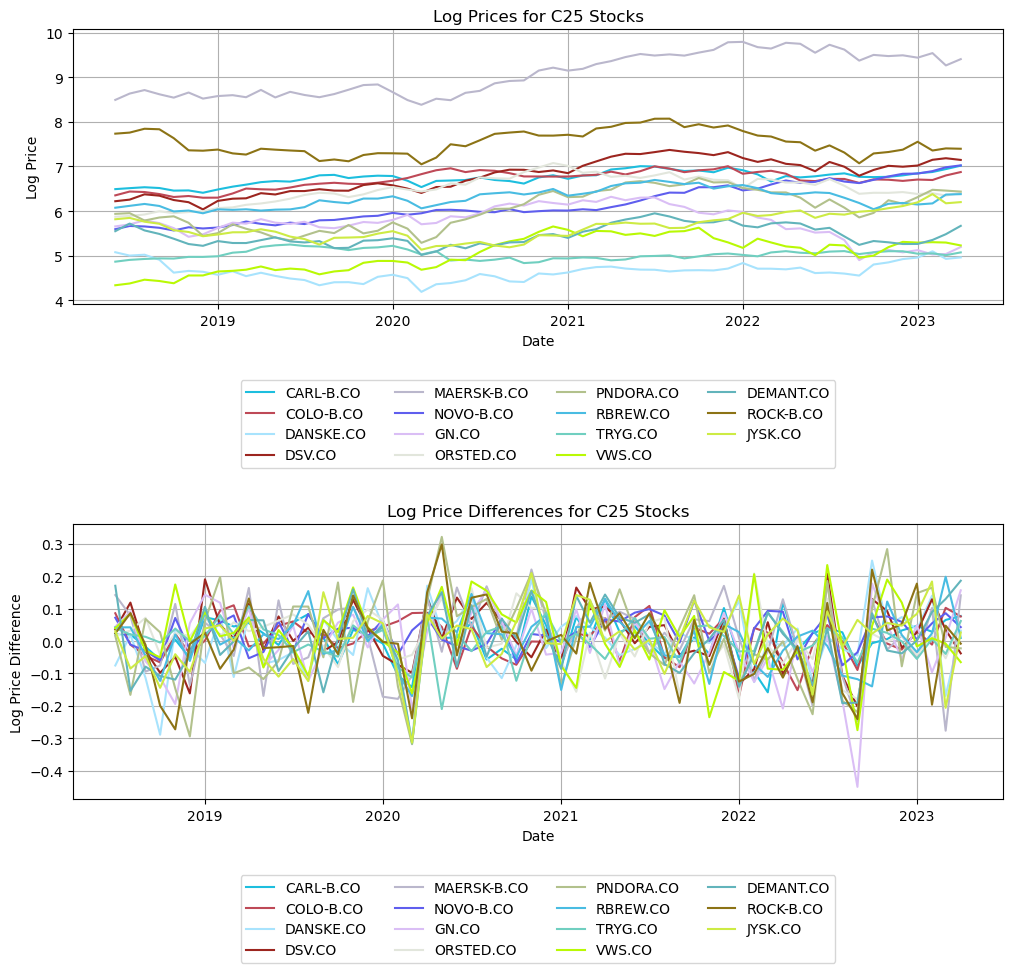

In [108]:
# Define the list of stocks in the Danish C25 index
c25_stocks = [
    'CARL-B.CO', 'COLO-B.CO', 'DANSKE.CO', 'DSV.CO',
    'MAERSK-B.CO', 'NOVO-B.CO', 'GN.CO',
    'ORSTED.CO', 'PNDORA.CO', 'RBREW.CO', 'TRYG.CO',
    'VWS.CO', 'DEMANT.CO', 'ROCK-B.CO', 'JYSK.CO',
]

# Set the start and end dates 
start_date = '2018-06-01'
end_date = '2023-05-01'

# Creating a directory for the data
output_dir = 'c25_stock_data'
os.makedirs(output_dir, exist_ok=True)

# Put the data in a collection 
data_collection = {}

for stock in c25_stocks:
    print(f"Collecting data for {stock}...")
    try:
        # Check if data file already exists
        filename = f"{output_dir}/{stock}.csv"
        if os.path.exists(filename):
            print(f"Data already exists for {stock}. Skipping download.")
            data = pd.read_csv(filename, index_col=0, parse_dates=True)
        else:
            # Download from yfinance
            data = yf.download(stock, start=start_date, end=end_date, interval='1mo')

            # Save the data to CSV file
            data.to_csv(filename)

        # Store the data in the data collection
        data_collection[stock] = data

        print(f"Data collected for {stock}")
    except Exception as e:
        print(f"Error collecting data for {stock}: {e}")

print("Data collection complete.")


# Calculate average log price differences for each stock
avg_log_diff_prices = {}

for stock, data in data_collection.items():
    log_diff = data['Adj Close'].apply(np.log).diff()
    avg_log_diff_prices[stock] = log_diff.mean() * 100

# Create subplots for log prices and log price differences
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.8)

# Plot 1
axs[0].set_title("Log Prices for C25 Stocks")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Log Price")

# Set up color for the graphs, since they reuse the colors 
stock_colors = {}

for stock in c25_stocks:
    # Generate a random color for each stock
    color = "#" + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)])
    stock_colors[stock] = color

for stock, data in data_collection.items():
    data['Log_Price'] = np.log(data['Adj Close'])
    axs[0].plot(data.index, data['Log_Price'], label=stock, color=stock_colors[stock])

axs[0].grid(True)
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=4)

# Plot 2
axs[1].set_title("Log Price Differences for C25 Stocks")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Log Price Difference")

for stock, data in data_collection.items():
    data['Log_Price_Diff'] = data['Log_Price'].diff()
    axs[1].plot(data.index, data['Log_Price_Diff'], label=stock, color=stock_colors[stock])

axs[1].grid(True)
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=4)

The first plot is the logarithmic stock prices of the 15 companies. When dealing with financial data, log prices are often used, as it smoothes out short term fluctuations and provides a clearer picture of the overall trends. Other than that, it is easier to compare the different companies, as their level of price is different.

We then calculate the log price differences in order to see visualize the volatility of the fifteen companies. Since we are looking at monthly data, we cannot see the flucuations in differences in prices within a month, and at the same time the flucuations might be larger since it is the differences for a whole month. Since we have a lot of companies in the plot, it is not entirely clear how volatile each company is, however this will be analysed futher in the analysis section of the project. 

The next section of code is where we take the data we have retrieved from yfinance and merge it with the ESG scores. For our later plots, we want to use the average monthly log price differences as well as their corresponding standard deviations and we therefore calculate those and merge it in the following code. 

In [109]:
# Store the Companies ESG Scores file and merge with data from yfinance
esg_scores_file = 'Companies ESG scores2.csv'
esg_scores_data = pd.read_csv(esg_scores_file, delimiter=";")

merged_data = pd.DataFrame({'stock': c25_stocks})

std_log_prices = {}

for stock, data in data_collection.items():
    log_prices = np.log(data['Adj Close'])
    std_log_prices[stock] = log_prices.std() * 100  

# Merge with the average log differences
merged_data['Average Log Difference'] = merged_data['stock'].map(avg_log_diff_prices)
merged_data['Standard Deviation'] = merged_data['stock'].map(std_log_prices)
merged_data['ESG Score'] = esg_scores_data['ESG Score']
print(merged_data)

          stock  Average Log Difference  Standard Deviation  ESG Score
0     CARL-B.CO                0.908357           15.110514         77
1     COLO-B.CO                0.901650           19.508082         75
2     DANSKE.CO               -0.200404           19.483086         75
3        DSV.CO                1.597549           37.590810         81
4   MAERSK-B.CO                1.577457           45.933438         71
5     NOVO-B.CO                2.469130           42.705966         85
6         GN.CO               -0.797797           36.119764         74
7     ORSTED.CO                0.923186           30.394984         76
8     PNDORA.CO                0.861128           42.525377         77
9      RBREW.CO                0.525889           20.283358         62
10      TRYG.CO                0.358036           10.550758         68
11       VWS.CO                1.540095           38.012849         73
12    DEMANT.CO                0.206056           22.503765         56
13    

# 3. <a id='toc3_'></a>[Data Analysis](#toc0_)

From the average monthly returns derived above as well as the ESG scores, we now create a scatter plot of these data points, which illustrates the relationship between each company's average monthly return and their corresponding ESG score. Since we will make multiple scatterplots, we are refering to the following defintion plot_scatter, so that we don't have to write up the layout everytime. 

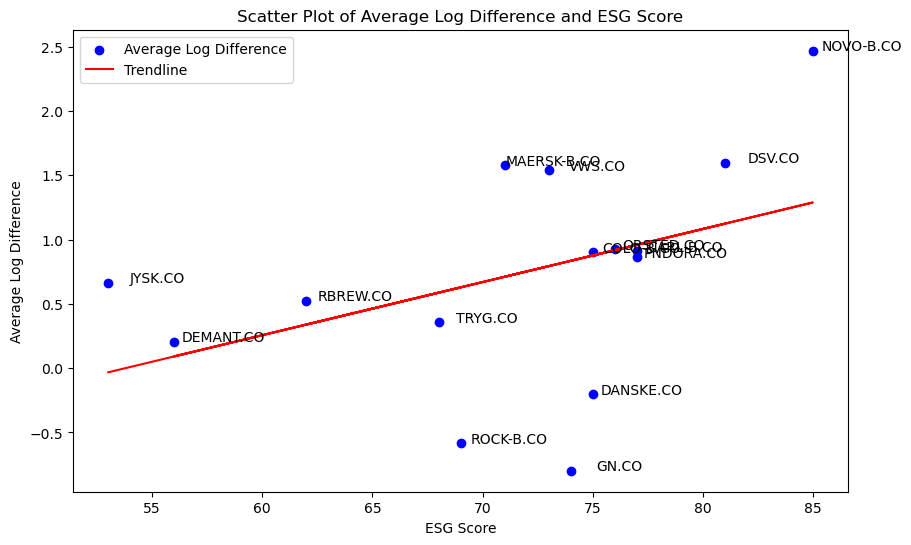

The slope of the trendline is: 0.0413


In [110]:
# Set up scatter plot for average log differences and ESG scores 
def plot_scatter(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, color='blue', label=ylabel)
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    trendline = intercept + slope * x
    plt.plot(x, trendline, color='red', label="Trendline")
    for i, stock in enumerate(merged_data['stock']):
        plt.annotate(stock, (x[i], y[i]), textcoords="offset points", xytext=(35, 0), ha='center')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()
    print('The slope of the trendline is: {:.4f}'.format(slope))

plot_scatter(merged_data['ESG Score'], merged_data['Average Log Difference'],
             "ESG Score", "Average Log Difference", "Scatter Plot of Average Log Difference and ESG Score")

The plot shows that in the case of these fifteen firms, the ones with a high ESG score tend to have a higher average return on a monthly basis. The majority of the chosen firms are placed relatively close to the trendline, but some of the firms (Danske Bank and GN Store Nord) have a decent ESG score and a negative monthly return in the period. These outliers are somewhat equalized by Novo Nordisk, that achieves both a high ESG score and high returns. 

The slope of the trendline is calculated to be 0.04 percantage points, which indicates that (for these fifteen firms) a hypothetical increase of 10 to the ESG score would increase the average monthly return by 0.4 percentage points.

We now plot the standard deviation (a measure for volatility) against the ESG scores in a scatter plot similar to the one above.

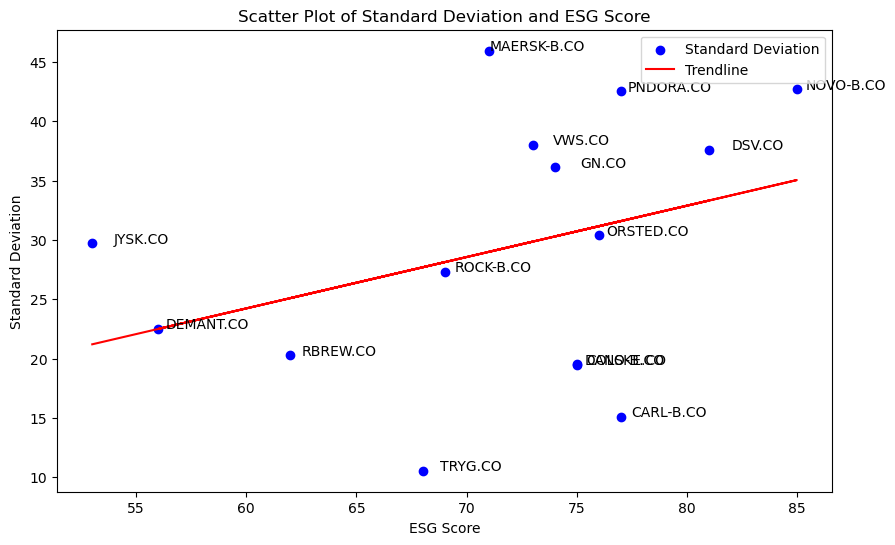

The slope of the trendline is: 0.4324


In [111]:
plot_scatter(merged_data['ESG Score'], merged_data['Standard Deviation'],
             "ESG Score", "Standard Deviation", "Scatter Plot of Standard Deviation and ESG Score")

The plot shows the relationship between ESG scores and volatility for each of the 15 companies. Furthermore, we have added a trendline, which has a slope of 0.44 percentage points, meaning that an increase in in the ESG score of 10 would increase the standard deviation (volatility) with 4.4 percentage points (for these fifteen companies). 

The dispertion is quite large and only few of the firms fit the trendline, which mean that the relationship between our two axes might not be as strong.


We now plot the standard deviation (a measure for volatility) against the average monthly returns in a scatter plot similarly to the previous ones.

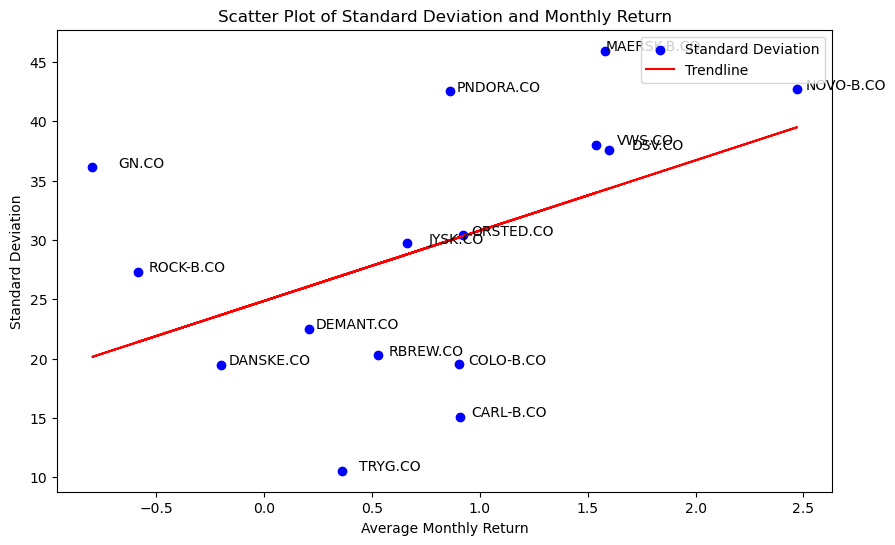

The slope of the trendline is: 5.9196


In [112]:
plot_scatter(merged_data['Average Log Difference'], merged_data['Standard Deviation'],
             "Average Monthly Return", "Standard Deviation", "Scatter Plot of Standard Deviation and Monthly Return")

The plot shows the relationship between average monthly return and the standard deviation (volatility). The trendline has a slope of 5.91 percentage points, meaning that a one percentage point increase in the log average monthly return would result in an increase 5.91 percentage point in the standard deviation. This indicates that there is a possible relationship between a higher monthly return and a higher volatility for these fifteen companies.

However, just as in the previous scatterplot the dispertion around the trendline is quite large, meaning that the relationship might not be as strong.  

# 4. <a id='toc4_'></a>[Conclusion](#toc0_)

From the data project, we can conclude that there seems to be a positive relationship between ESG score and the average monthly return for these 15 companies. Furthermore, we looked into the relationship between average monthly return and the standard deviation (volatility), which showed a positive, but weak relationship. 

Some of the correlation between ESG score and returns can be directly explained through the rating criteria of ESG, as one of the governance related parameters is "shareholders' rights". A high score here makes the stock more attractive and more expensive because a (probably) higher rate of dividends being paid. And as the world consensus regarding sustainability is weighing the other ESG rating criteria more, it makes sense, that high scores correlate with high returns over this recent period.

The positive relationship between returns and volatility is a typical result from analyses on financial data. This occurs because an investment project with high risk (volatility) is more likely to yield a great return compared to a safe investment. Risk-averse investors thus require a risk premium in order to invest in the risky stocks. 

It should be noted that the data is limited in the sense that it only goes 5 years back and might not capture relevant history regarding volatility for the stocks. As mentioned, the stocks are also few, such that data points like "Tryg" and "Maersk" impacts the overall relationship greatly in the last scatterplot. Lastly the data shows monthly prices, and some of the day-to-day fluctuations and volatility is not observed. This means that some of the volatility can be explained by the overall growth from the beginning to the end of the period.

Companies that are doing well (in regards to high returns) also has focus on ESG criteria and scores high ESG scores. ESG strategies are being more and more implemented in bigger companies. This is mainly due to popularity as well as demands from the government/EU. 